<a href="https://colab.research.google.com/github/JumaOchi/PortfolioProjects/blob/main/SFR_PROJECT_TOP_n_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Importing the necessary libraries
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Load the data set
file_path = '/content/drive/My Drive/Launch SFR.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head()

,Company,SFR,Payload (kg),Launch Cost ($M),Price ($/kg),Funding ($M),Launch Class,Orbit Altitude,Tech Type,Country,HQ Location,Description
0,Arianespace/Avio,9,"20,000",170.00,"8,500",Public,"Medium, Heavy",LEO,Rocket,Italy,Colleferro,Developing the Vega & Ariane launch vehicles
1,Astra Space,9,300,3.95,"13,167",Public,Small,LEO,Rocket,United States,"Alameda, CA",Providing routine launch access to Earth orbit...
2,Black Sky Aerospace,9,350,0.60,"1,714",-,Small,Suborbital,Rocket,Australia,"Browns Plains, Queensland","Offers a range of sounding rockets, capable of..."
3,Blue Origin,9,0,0.00,0,-,"Tourism, Small, Heavy",Suborbital,Rocket,United States,"Kent, WA",Lowering the cost of access to space with reus...
4,CNIM Air Space,9,"2,700",0.00,0,Public,"Small, Medium",Suborbital,Balloon,France,Ayguesvives,Balloons that lift anything from a few kilogra...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           183 non-null    object 
 1   SFR               183 non-null    int64  
 2   Payload (kg)      183 non-null    object 
 3   Launch Cost ($M)  183 non-null    float64
 4   Price ($/kg)      183 non-null    object 
 5   Funding ($M)      183 non-null    object 
 6   Launch Class      183 non-null    object 
 7   Orbit Altitude    183 non-null    object 
 8   Tech Type         183 non-null    object 
 9   Country           183 non-null    object 
 10  HQ Location       183 non-null    object 
 11  Description       183 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 17.3+ KB


In [ ]:
data.shape

(183, 12)

In [ ]:
data.size

2196

In [ ]:
data.describe()

,SFR,Launch Cost ($M)
count,183.000000,183.000000
mean,3.726776,4.840956
std,2.527148,19.132872
min,0.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.500000
max,9.000000,170.000000


In [ ]:
#Check for missing values
data.isnull().sum()

,0
Company,0
SFR,0
Payload (kg),0
Launch Cost ($M),0
Price ($/kg),0
Funding ($M),0
Launch Class,0
Orbit Altitude,0
Tech Type,0
Country,0


In [ ]:
# Check for duplicates
duplicates = data.duplicated().sum()

#percentage of duplicates of the total data
percentage = data.duplicated().sum() / data.shape[0] * 100

print(f'{duplicates} rows contain duplicates amounting to {percentage.round(2)}% of the total data.')

0 rows contain duplicates amounting to 0.0% of the total data.


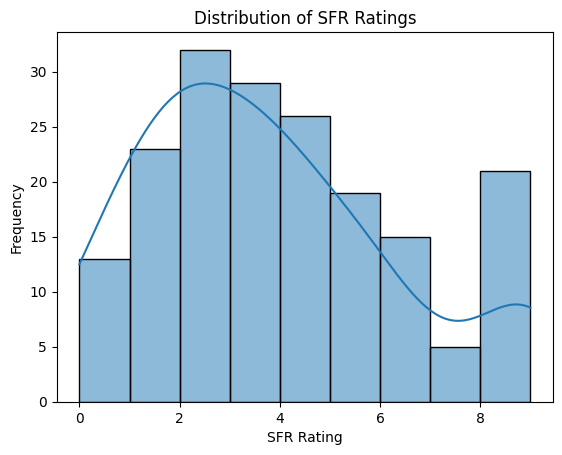

In [ ]:
# Distribution of SFR ratings
sns.histplot(data['SFR'], bins=9, kde=True)
plt.title('Distribution of SFR Ratings')
plt.xlabel('SFR Rating')
plt.ylabel('Frequency')
plt.show()

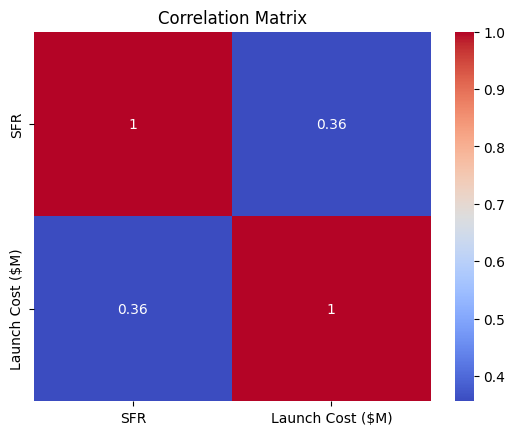

In [ ]:
# Select only numerical columns before calculating correlation
numerical_data = data.select_dtypes(include=['number'])

# Correlation matrix
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           183 non-null    object 
 1   SFR               183 non-null    int64  
 2   Payload (kg)      183 non-null    object 
 3   Launch Cost ($M)  183 non-null    float64
 4   Price ($/kg)      183 non-null    object 
 5   Funding ($M)      183 non-null    object 
 6   Launch Class      183 non-null    object 
 7   Orbit Altitude    183 non-null    object 
 8   Tech Type         183 non-null    object 
 9   Country           183 non-null    object 
 10  HQ Location       183 non-null    object 
 11  Description       183 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 17.3+ KB


In [ ]:
# Convert columns to numeric, handle errors and missing values
data['Payload (kg)'] = pd.to_numeric(data['Payload (kg)'], errors='coerce') #Removed .str.replace(',', '')
data['Price ($/kg)'] = pd.to_numeric(data['Price ($/kg)'], errors='coerce') #Removed .str.replace(',', '')
data['Funding ($M)'] = pd.to_numeric(data['Funding ($M)'], errors='coerce') #Removed .str.replace(',', '')
#data['Orbit Altitude'] = pd.to_numeric(data['Orbit Altitude'], errors='coerce') #Removed .str.replace(',', '')

# Check for and handle any resulting NaN values
# Instead of dropping all rows with NaN, consider imputing missing values
# For example, you could replace NaNs with the mean or median of the column:
for col in ['Payload (kg)', 'Price ($/kg)', 'Funding ($M)']:
    data[col] = data[col].fillna(data[col].mean())

In [ ]:
data.head()

,Company,SFR,Payload (kg),Launch Cost ($M),Price ($/kg),Funding ($M),Launch Class,Orbit Altitude,Tech Type,Country,HQ Location,Description
0,Arianespace/Avio,9,157.4,170.00,16.205357,226.989048,"Medium, Heavy",LEO,Rocket,Italy,Colleferro,Developing the Vega & Ariane launch vehicles
1,Astra Space,9,300.0,3.95,16.205357,226.989048,Small,LEO,Rocket,United States,"Alameda, CA",Providing routine launch access to Earth orbit...
2,Black Sky Aerospace,9,350.0,0.60,16.205357,226.989048,Small,Suborbital,Rocket,Australia,"Browns Plains, Queensland","Offers a range of sounding rockets, capable of..."
3,Blue Origin,9,0.0,0.00,0.000000,226.989048,"Tourism, Small, Heavy",Suborbital,Rocket,United States,"Kent, WA",Lowering the cost of access to space with reus...
4,CNIM Air Space,9,157.4,0.00,0.000000,226.989048,"Small, Medium",Suborbital,Balloon,France,Ayguesvives,Balloons that lift anything from a few kilogra...


In [ ]:
#DATA PREPROCESSING
# Drop the 'Description' column it's not necessary for the analysis
data_new = data.drop(columns=['Description'])

#Given the above it is important to impute or drop the Orbit Altitude column
#Since all of them seem to be Nan values we will drop the entire column
#data_new = data_new.drop(columns=['Orbit Altitude'])

# Encode categorical variables
categorical_features = ['Launch Class', 'Tech Type', 'Country', 'Orbit Altitude', 'HQ Location']
numerical_features = ['Payload (kg)', 'Launch Cost ($M)', 'Price ($/kg)', 'Funding ($M)']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) # Added handle_unknown='ignore'
    ])


In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           183 non-null    object 
 1   SFR               183 non-null    int64  
 2   Payload (kg)      183 non-null    float64
 3   Launch Cost ($M)  183 non-null    float64
 4   Price ($/kg)      183 non-null    float64
 5   Funding ($M)      183 non-null    float64
 6   Launch Class      183 non-null    object 
 7   Orbit Altitude    183 non-null    object 
 8   Tech Type         183 non-null    object 
 9   Country           183 non-null    object 
 10  HQ Location       183 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 15.9+ KB


In [ ]:
# Check for NaN values
print("Checking for NaN values:")
print(data_new.isna().sum())

# Check for infinite values in numerical columns only
print("\nChecking for infinite values:")
for col in data_new.select_dtypes(include=np.number):
    print(f'{col}: {np.isinf(data_new[col]).sum()}')

Checking for NaN values:
Company             0
SFR                 0
Payload (kg)        0
Launch Cost ($M)    0
Price ($/kg)        0
Funding ($M)        0
Launch Class        0
Orbit Altitude      0
Tech Type           0
Country             0
HQ Location         0
dtype: int64

Checking for infinite values:
SFR: 0
Payload (kg): 0
Launch Cost ($M): 0
Price ($/kg): 0
Funding ($M): 0


In [ ]:
# Split the dataset
X = data_new.drop('SFR', axis=1)
y = data_new['SFR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [ ]:
#USING LINEAR REGRESSION
# Build and train the model
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

# Predictions
y_pred = model.predict(X_test_preprocessed)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 4.311610570482645e+25
R^2 Score: -6.973765206747095e+24


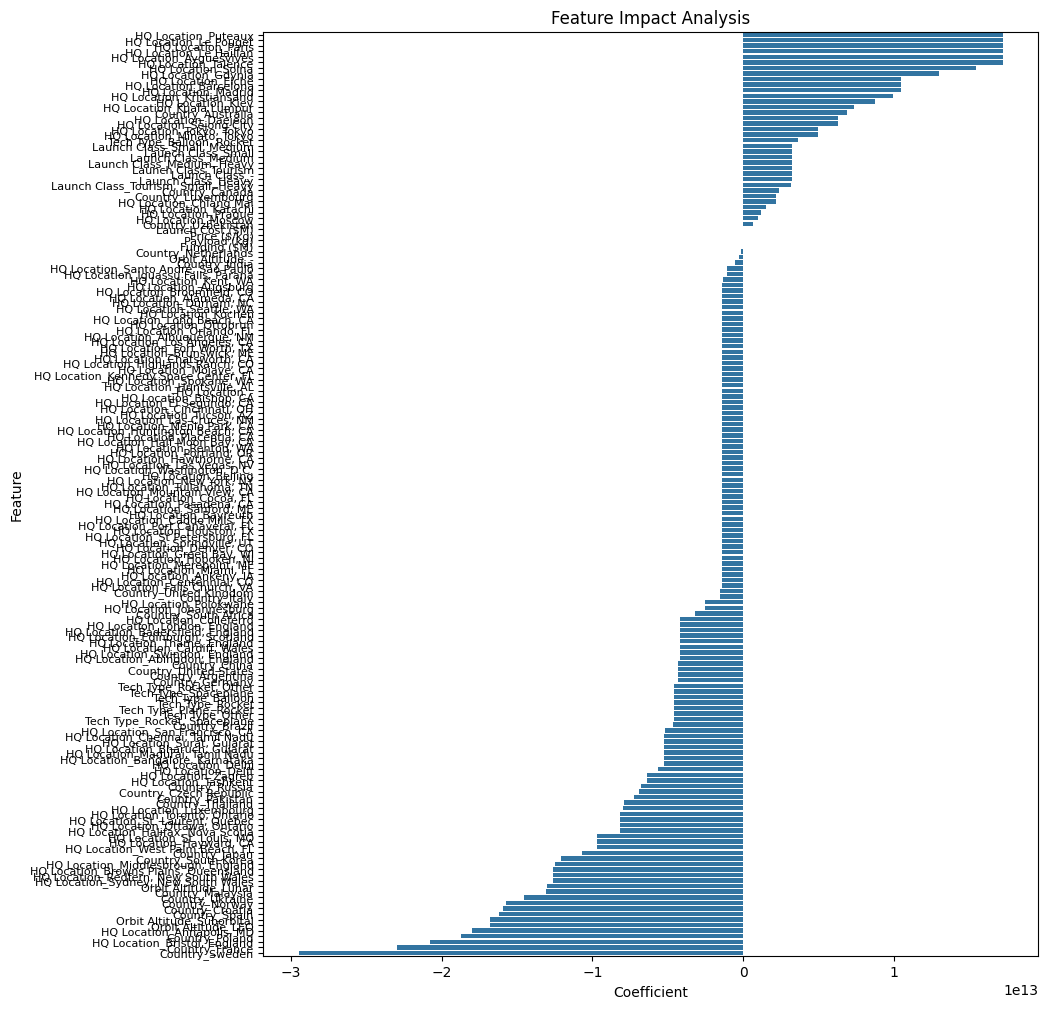

In [ ]:
# Get feature importances
feature_names = (preprocessor.transformers_[0][1].get_feature_names_out(numerical_features).tolist() +
                 preprocessor.transformers_[1][1].get_feature_names_out(categorical_features).tolist())

coefficients = model.coef_

# Create a DataFrame for coefficients
features_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
features_df = features_df.sort_values(by='Coefficient', ascending=False)

#plot the histogram
plt.figure(figsize=(10, 12)) # Increased figure height

sns.barplot(x='Coefficient', y='Feature', data=features_df)
plt.title('Feature Impact Analysis')

plt.yticks(fontsize=8) # Adjust font size as needed

plt.show()

#It is important to handle the cramping up of features in the below plots a heatmap would work
#since it can handle a large number of features but still doesnt address the issue that some of the features
#could have very little to no explanatory power. I am going to explore 3 possible solutions to better visualize
#and address this issues Grouping the features into categories, reducing dimensionality or selecting top N features


In [ ]:
#Given the nature of your dataset and the objective to predict a continuous SFR rating (which seems to be an ordinal variable)
# Logistic regression or linear might might not be best suited so we will attempt using RandomForestRegression or XGBoost Regression

#RANDOM FOREST REGRESSION

from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_preprocessed, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_preprocessed)

# Model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')


Random Forest Mean Squared Error: 3.0816729729729726
Random Forest R^2 Score: 0.5015583293950852


In [ ]:
#XGBOOST REGRESSION

import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train_preprocessed, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test_preprocessed)

# Model evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGBoost Mean Squared Error: {mse_xgb}')
print(f'XGBoost R^2 Score: {r2_xgb}')


XGBoost Mean Squared Error: 3.3944934281924537
XGBoost R^2 Score: 0.4509615426281346


Linear Regression R^2 Score: -6.973765206747095e+24
Random Forest R^2 Score: 0.5015583293950852
XGBoost R^2 Score: 0.4509615426281346


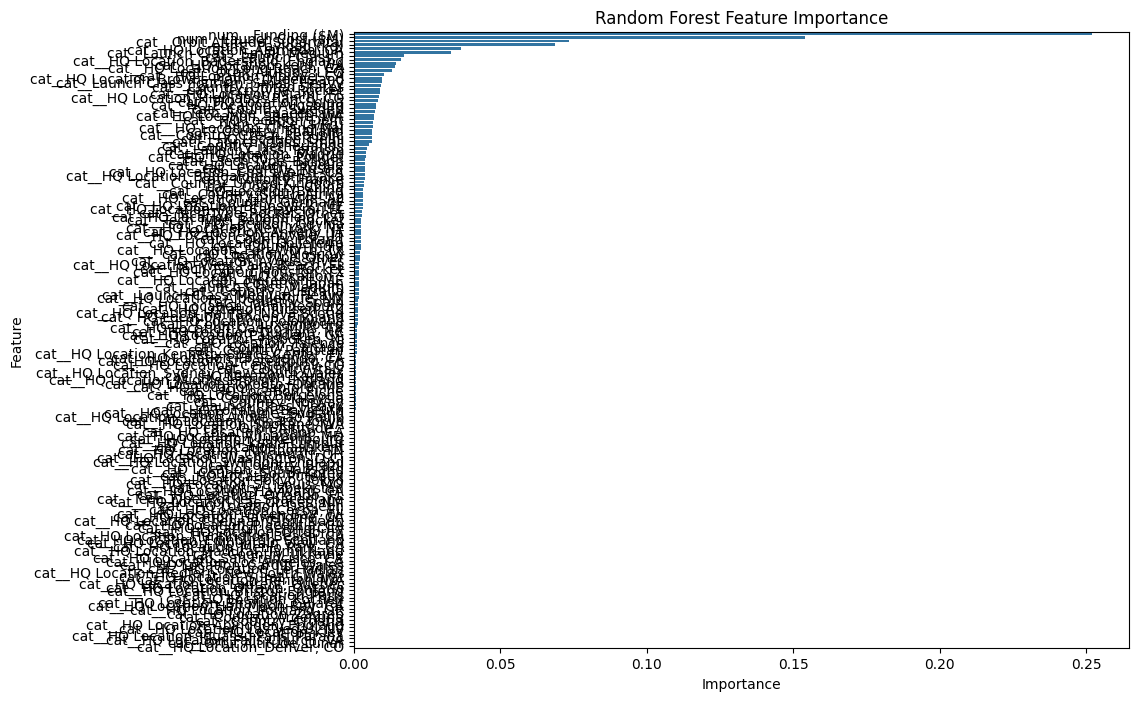

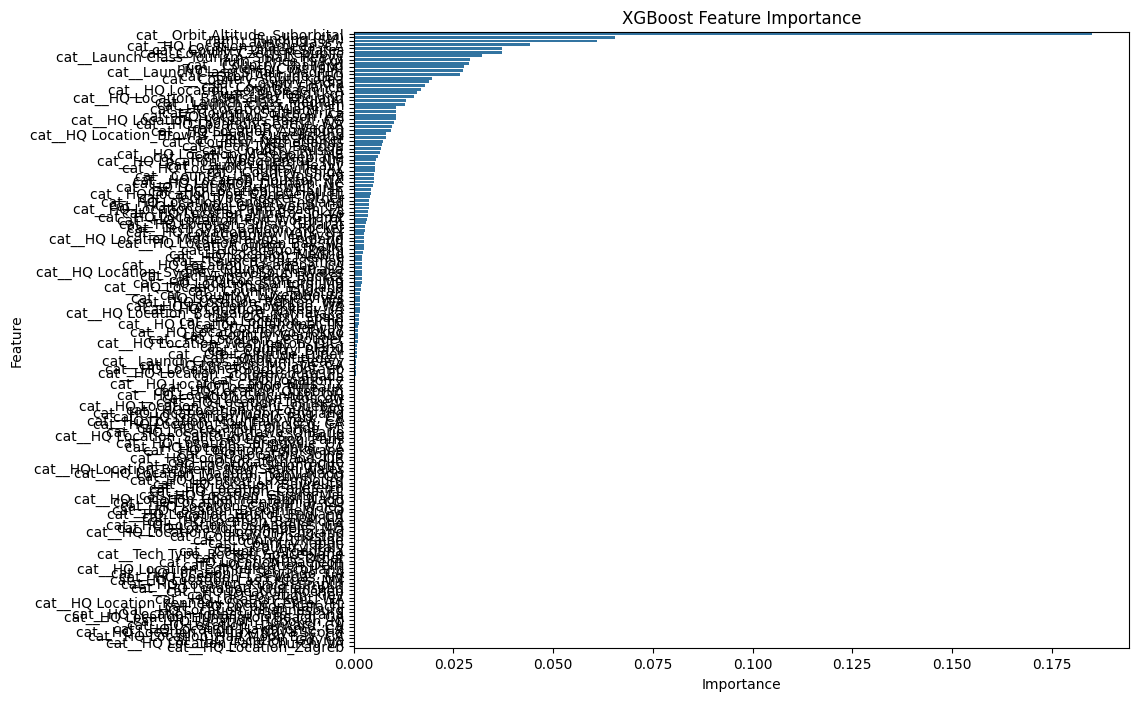

In [ ]:
# Compare performance
print(f'Linear Regression R^2 Score: {r2}')
print(f'Random Forest R^2 Score: {r2_rf}')
print(f'XGBoost R^2 Score: {r2_xgb}')

# Feature importance from Random Forest
importances_rf = rf_model.feature_importances_
features_df_rf = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': importances_rf})
features_df_rf = features_df_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_rf)
plt.title('Random Forest Feature Importance')
plt.show()

# Feature importance from XGBoost
importances_xgb = xgb_model.feature_importances_
features_df_xgb = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': importances_xgb})
features_df_xgb = features_df_xgb.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df_xgb)
plt.title('XGBoost Feature Importance')
plt.show()


In [ ]:
# Assuming you have a trained Random Forest model (rf_reg)
importances = rf_model.feature_importances_
feature_names = X.columns  # Replace with your actual feature names
# Feature importance from Random Forest
importances_rf = rf_model.feature_importances_
features_df_rf = pd.DataFrame({'Feature': preprocessor.get_feature_names_out(), 'Importance': importances_rf})
features_df_rf = features_df_rf.sort_values(by='Importance', ascending=False)

# Display the top n features
top_n = 10  # or however many features you want to retain
top_features = features_df_rf.head(top_n)
print(top_features)


                                   Feature  Importance
3                        num__Funding ($M)    0.251888
1                    num__Launch Cost ($M)    0.154063
51          cat__Orbit Altitude_Suborbital    0.073326
0                        num__Payload (kg)    0.068548
54            cat__HQ Location_Alameda, CA    0.036751
9          cat__Launch Class_Small, Medium    0.033030
4                      cat__Launch Class_-    0.017147
60   cat__HQ Location_Badersfield, England    0.016121
105              cat__HQ Location_Kent, WA    0.014477
115        cat__HQ Location_Long Beach, CA    0.014096


In [ ]:

import pandas as pd

# Assuming you are working with the training set
X_transformed_df = pd.DataFrame(X_train_preprocessed, columns=preprocessor.get_feature_names_out())

# Extract the top feature names from your earlier analysis
top_feature_names = top_features['Feature'].tolist()

# Select the top `n` features
X_top_n = X_transformed_df[top_feature_names]

# Verify the resulting DataFrame
print(X_top_n.head())




   num__Funding ($M)  num__Launch Cost ($M)  cat__Orbit Altitude_Suborbital  \
0          -1.226848               0.008639                             0.0   
1           0.344924              -0.242285                             0.0   
2           0.011847               0.315325                             0.0   
3          -1.258959              -0.242285                             1.0   
4          -1.258746              -0.242285                             0.0   

   num__Payload (kg)  cat__HQ Location_Alameda, CA  \
0           2.574938                           0.0   
1          -0.054976                           0.0   
2          -0.011729                           0.0   
3          -0.721221                           0.0   
4           1.113875                           0.0   

   cat__Launch Class_Small, Medium  cat__Launch Class_-  \
0                              0.0                  0.0   
1                              0.0                  0.0   
2                      

In [ ]:
from sklearn.model_selection import train_test_split

# Step 1: Split the original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Preprocess the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Step 3: Select the top features from the preprocessed training data
X_train_top_n = pd.DataFrame(X_train_preprocessed, columns=preprocessor.get_feature_names_out())[top_feature_names]

# Step 4: Preprocess the test data using the same pipeline
X_test_preprocessed = preprocessor.transform(X_test)

# Apply the same top n feature selection to the test data
X_test_top_n = pd.DataFrame(X_test_preprocessed, columns=preprocessor.get_feature_names_out())[top_feature_names]

# Now, X_train_top_n and y_train should have matching rows
print(X_train_top_n.shape)  # Should be (number_of_samples, number_of_selected_features)
print(y_train.shape)        # Should match number_of_samples


(146, 10)
(146,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_top_n, y_train)

# Predict on the training data to see how well it fits the training set
y_train_pred = rf_model.predict(X_train_top_n)

# Predict on the test set
y_test_pred = rf_model.predict(X_test_top_n)




In [ ]:
# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Training MSE: {mse_train}')
print(f'Training R²: {r2_train}')

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Test MSE: {mse_test}')
print(f'Test R²: {r2_test}')


Training MSE: 1.031349445428575
Training R²: 0.8384141123036206
Test MSE: 4.1651208901577945
Test R²: 0.32631728513397684


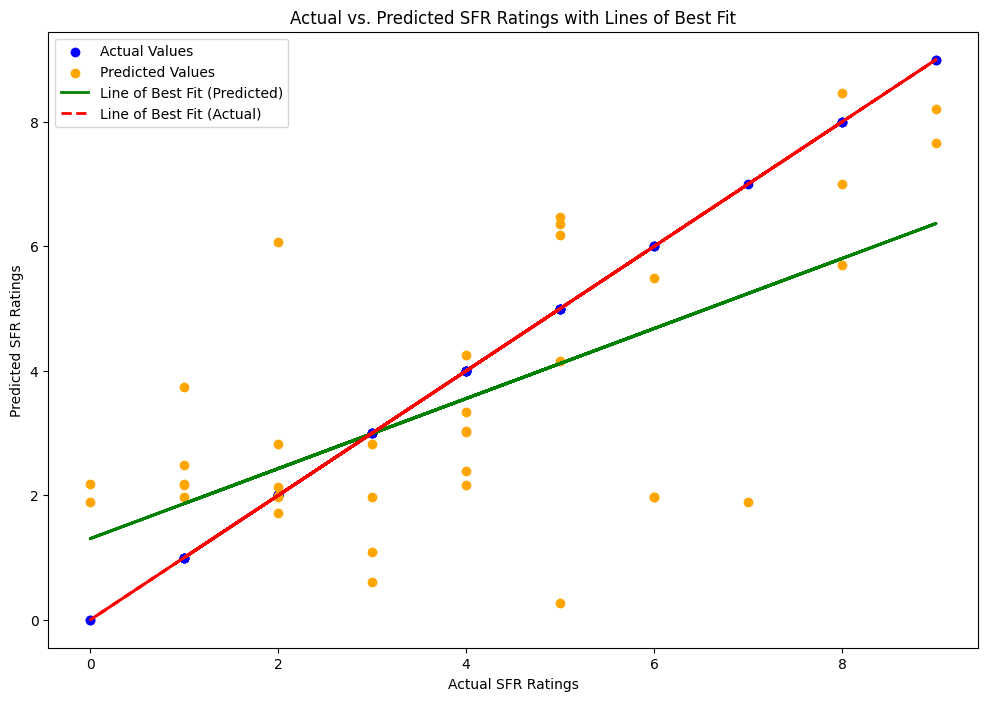

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(12, 8))

# Scatter plot for actual values
plt.scatter(y_test, y_test, color='blue', label='Actual Values')

# Scatter plot for predicted values
plt.scatter(y_test, y_test_pred, color='orange', label='Predicted Values')

# Calculate the line of best fit for the predicted values
m_pred, b_pred = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m_pred*y_test + b_pred, color='green', linewidth=2, label='Line of Best Fit (Predicted)')

# Calculate the line of best fit for the actual values to see their trend
m_actual, b_actual = np.polyfit(y_test, y_test, 1)
plt.plot(y_test, m_actual*y_test + b_actual, color='red', linestyle='--', linewidth=2, label='Line of Best Fit (Actual)')

# Add labels and title
plt.xlabel('Actual SFR Ratings')
plt.ylabel('Predicted SFR Ratings')
plt.title('Actual vs. Predicted SFR Ratings with Lines of Best Fit')

# Add a legend
plt.legend()

# Show the plot
plt.show()



In [ ]:
# Get feature importances from the Random Forest model
importances_rf = rf_model.feature_importances_

# Create a DataFrame to display the feature importances
features_df_rf = pd.DataFrame({'Feature': top_feature_names, 'Importance': importances_rf})
features_df_rf = features_df_rf.sort_values(by='Importance', ascending=False)

# Display the top features
print(features_df_rf.head(10))


                                 Feature  Importance
0                      num__Funding ($M)    0.308352
1                  num__Launch Cost ($M)    0.203416
3                      num__Payload (kg)    0.188601
2         cat__Orbit Altitude_Suborbital    0.113915
4           cat__HQ Location_Alameda, CA    0.041501
5        cat__Launch Class_Small, Medium    0.040053
8              cat__HQ Location_Kent, WA    0.036287
6                    cat__Launch Class_-    0.027055
7  cat__HQ Location_Badersfield, England    0.021526
9        cat__HQ Location_Long Beach, CA    0.019295


In [ ]:
#It is important to handle the cramping up of features in the below plots a heatmap would work
#since it can handle a large number of features but still doesnt address the issue that some of the features
#could have very little to no explanatory power. I am going to explore 3 possible solutions to better visualize
#and address this issues Grouping the features into categories, reducing dimensionality or selecting top N features

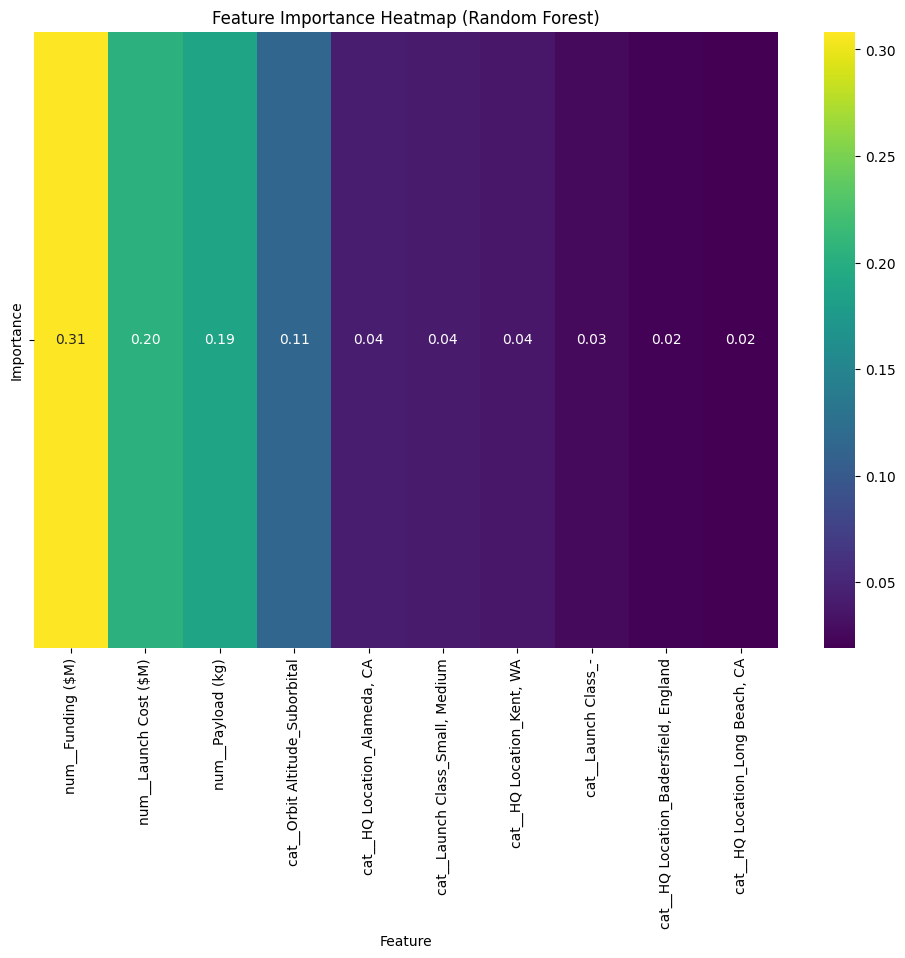

In [ ]:
# Sort features by importance
features_df_rf_sorted = features_df_rf.sort_values(by='Importance', ascending=False)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(features_df_rf_sorted.set_index('Feature').T, cmap='viridis', annot=True, fmt='.2f')
plt.title('Feature Importance Heatmap (Random Forest)')
plt.show()


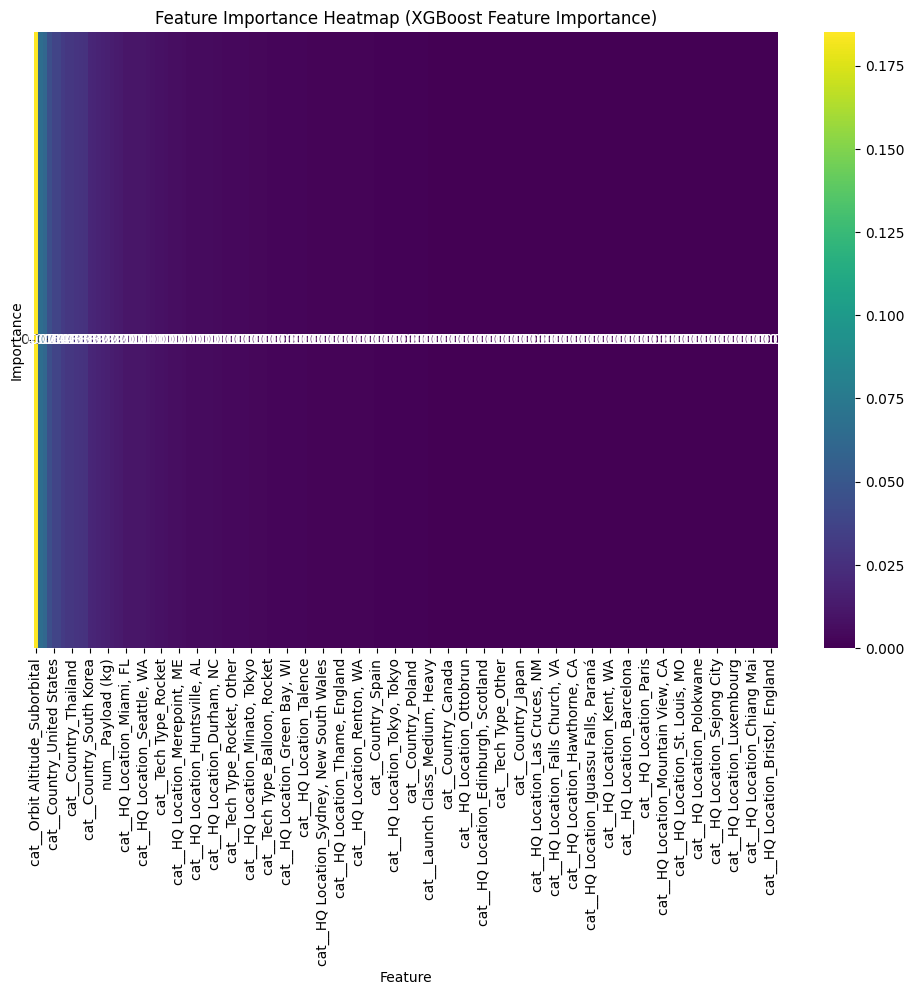

In [ ]:
# Sort features by importance
features_df_xgb_sorted = features_df_xgb.sort_values(by='Importance', ascending=False)

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(features_df_xgb_sorted.set_index('Feature').T, cmap='viridis', annot=True, fmt='.2f')
plt.title('Feature Importance Heatmap (XGBoost Feature Importance)')
plt.show()
